In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




import gc #Trash Collection
import re #Regular Expression
import joblib #Export Pre-Processor/Model 

# import seaborn for more plotting options(built on top of matplotlib)

import seaborn as sns

(56288, 122)
(48744, 121)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    51748
1     4540
Name: TARGET, dtype: int64

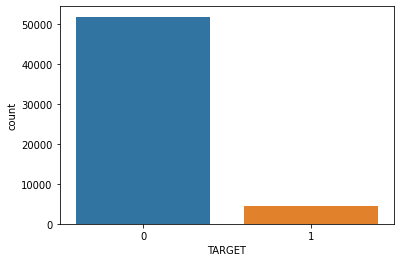

In [2]:
# import dataset application_train.csv an application_test.csv
df_train = pd.read_csv('/content/application_train.csv')
df_test = pd.read_csv('/content/application_test.csv')

#describe df_train and  df_test

df_train.describe()
df_test.describe()
print(df_train.shape)
print(df_test.shape)

#How the target labels are spread
sns.countplot(df_train.TARGET)
df_train['TARGET'].value_counts()

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Drop rows with NaN values
df_train = df_train.dropna()

# one-hot encoding of categorical variables
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)



Accuracy: 93.93%
ROC AUC Score: 56.12%


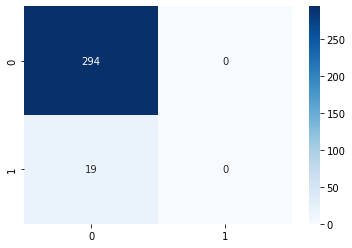

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('TARGET', axis=1), df_train['TARGET'], test_size=0.2)

# Create the random forest classifier
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)


# Evaluate the classifier on the test data
accuracy = clf.score(X_test, y_test)


# accuracy
print('Accuracy: {:.2f}%'.format(accuracy * 100))

# roc_auc_score
print('ROC AUC Score: {:.2f}%'.format(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]) * 100))

#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

#dataviz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Create a confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))

# Create a heatmap

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# create confusion matrix.png 
plt.savefig('confusion_matrix.png')




In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Get the list of columns in the training data
train_cols = df_train.drop('TARGET', axis=1).columns

# Get the list of columns in the test data
test_cols = df_test.columns

# Find the missing columns in the test data
missing_cols = set(train_cols) - set(test_cols)

# Add the missing columns to the test data with empty or NaN values
for col in missing_cols:
    df_test[col] = np.nan

# Make sure that the column order in the test data is the same as in the training data
df_test = df_test[train_cols]

# Fit the imputer on the training data
imputer.fit(df_train.drop('TARGET', axis=1))

# Transform the test data using the imputer
df_test_imputed = imputer.transform(df_test)

# Make predictions on the test data
y_pred = clf.predict_proba(df_test_imputed)[:, 1]

# Create a new dataframe with the ID and the predicted values
submission_random_forest = df_test[['SK_ID_CURR']]
submission_random_forest['TARGET'] = y_pred

# Save the dataframe to a csv file
submission_random_forest.to_csv("random_forest.csv", index=False)



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
<ipython-input-6-64a9269a33ec>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission_random_forest['TARGET'] = y_pred


In [7]:
# mlflow
import mlflow
import mlflow.sklearn


# Create an experiment
mlflow.set_experiment('Home Credit Default Risk2')

# Start a run
with mlflow.start_run():
        
        # Log the model
        mlflow.sklearn.log_model(clf, 'model')
        
        # Log the accuracy
        mlflow.log_metric('accuracy', accuracy)
        
        # Log the roc_auc_score
        mlflow.log_metric('roc_auc_score', roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
        
        # Log the confusion matrix
        mlflow.log_artifact('confusion_matrix.png')
        
        # Log parameters
        
        mlflow.log_param('n_estimators', clf.n_estimators)
        mlflow.log_param('max_depth', clf.max_depth)
        mlflow.log_param('min_samples_split', clf.min_samples_split)
        mlflow.log_param('min_samples_leaf', clf.min_samples_leaf)
        mlflow.log_param('max_features', clf.max_features)
        mlflow.log_param('max_leaf_nodes', clf.max_leaf_nodes)
        mlflow.log_param('min_impurity_decrease', clf.min_impurity_decrease) 
        
        



ModuleNotFoundError: ignored

In [ ]:
import mlflow.sklearn

# save the model and its associated metadata
mlflow.sklearn.save_model(clf, 'model')

In [8]:
# import joblib 
import joblib

# save model as pickle file
model=joblib.load(r'C:\Users\sambo\Documents\GitHub\MLflow\model\model.pkl')




FileNotFoundError: ignored

In [10]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 15.5 MB/s eta 0:00:00


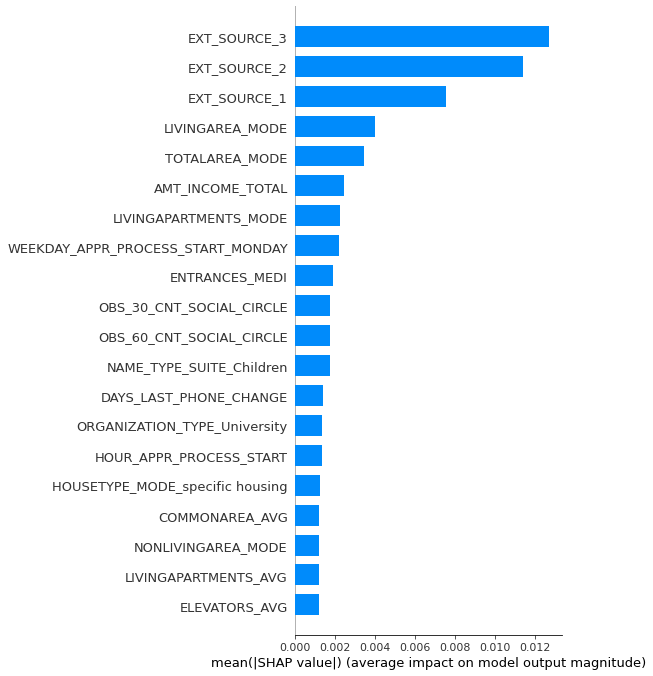

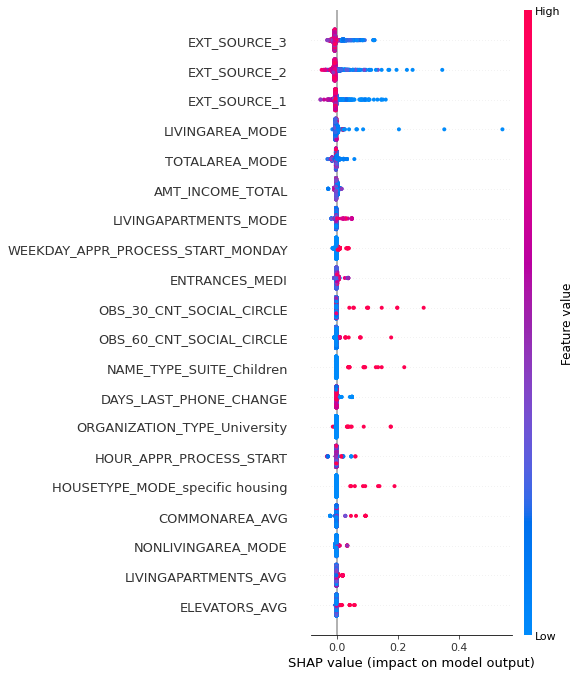

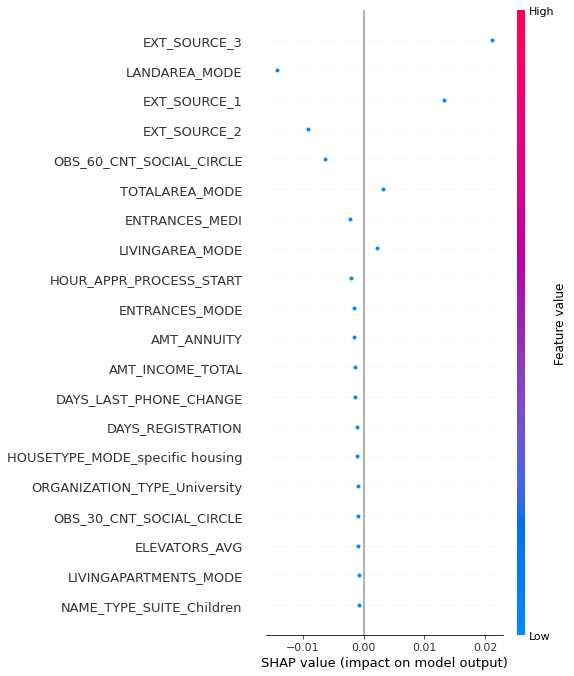

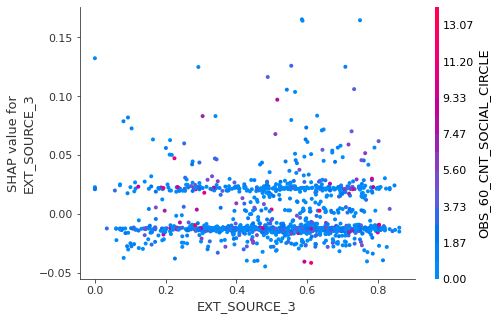

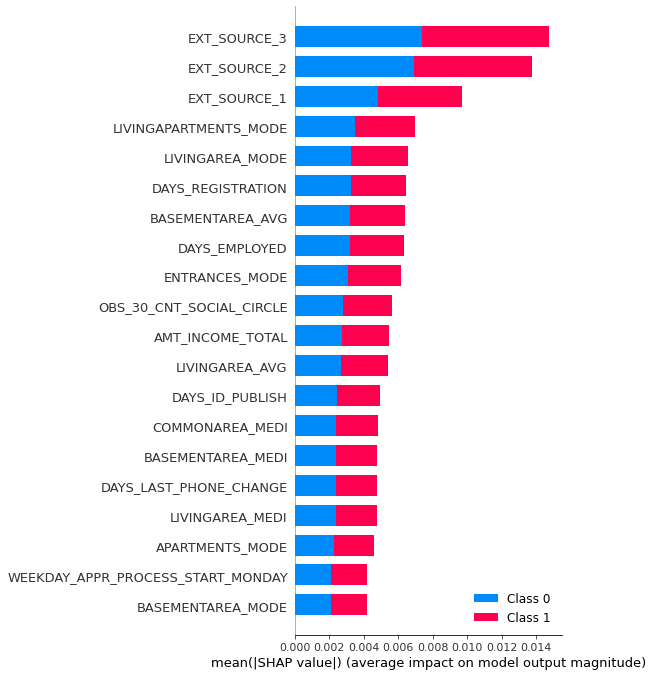

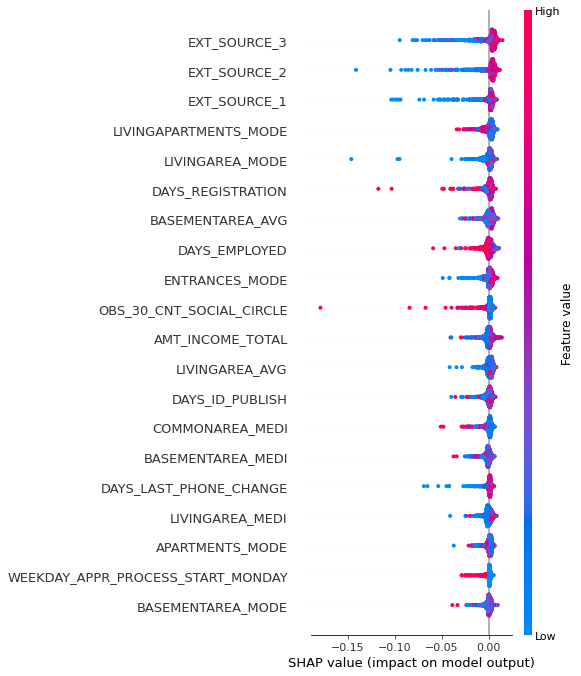

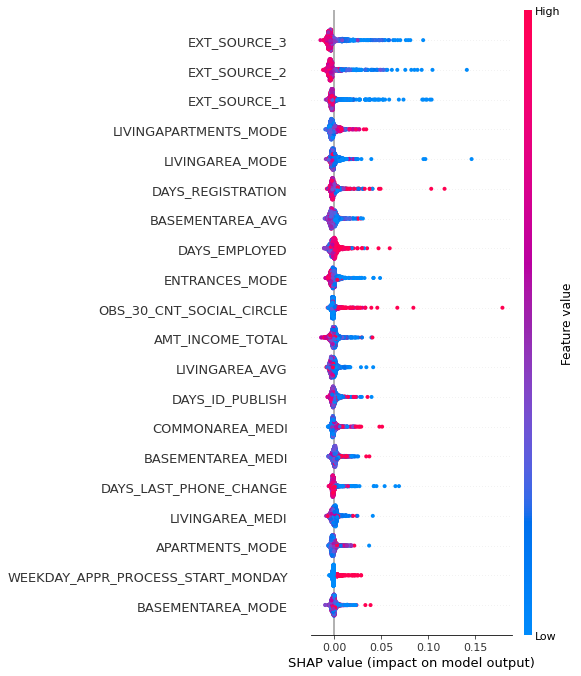

In [54]:
from sklearn.ensemble import RandomForestRegressor
import shap
X_train, X_test, Y_train, Y_test = train_test_split(df_train.drop('TARGET', axis=1), df_train['TARGET'], test_size=0.2)

# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10).fit(X_train, Y_train)

my_shap_values = shap.TreeExplainer(model).shap_values(X_train)

#For all values, those are the visualizations :
shap.summary_plot(my_shap_values, X_train, plot_type="bar")
shap.summary_plot(my_shap_values, X_train)

#For one point of the shap values we have :
shap.summary_plot(my_shap_values[-1:], X_train[-1:])

#To have more visualisation we choose the most impactful variable "EXT_SOURCE_1" to see what kind of relation it has with the target:
shap.dependence_plot("EXT_SOURCE_3", shap_values, X_train)

from sklearn.ensemble import RandomForestClassifier
my_class_model = RandomForestClassifier(random_state=0).fit(X_train, Y_train)
my_new_shap_values = shap.TreeExplainer(my_class_model).shap_values(X_train)

shap.summary_plot(my_new_shap_values, X_train, plot_type="bar")

#Summary for class 0
shap.summary_plot(my_new_shap_values[0], X_train)

#Summary for class 1
shap.summary_plot(my_new_shap_values[1], X_train)

#The first graphe we obtained is a variable importance plot, it gives us a global interpretability. On this plot the variables at the top are the one with the most impact on the model, meaning they have the most predictive power.
#So the variables "EXT_SOURCE_3", "EXT_SOURCE_1" and "EXT_SOURCE_2" have the most impact on the model. While "AMT_CREDIT" has the least.